In [47]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import yfinance as yf
from __future__ import division

In [32]:
tickers = ['AAPL','AMZN','FB','MSFT','GOOGL']

stock_data = pd.DataFrame(columns = tickers)

for cols in stock_data.columns:
    data = yf.Ticker(cols)
    stock_data[cols] = data.history(period = "5y")['Close']

In [33]:
stock_data.head()

,AAPL,AMZN,FB,MSFT,GOOGL
Date,,,,,
2016-07-18,23.314920,736.070007,119.370003,49.711090,753.200012
2016-07-19,23.324263,739.950012,120.610001,48.909595,753.409973
2016-07-20,23.345284,745.719971,121.919998,51.507542,757.080017
2016-07-21,23.221504,744.429993,120.610001,51.406200,754.409973
2016-07-22,23.041672,744.859985,121.000000,52.115578,759.280029


#### Total Return

In [70]:
total_return = (stock_data.iloc[-1] - stock_data.iloc[0]) / stock_data.iloc[0]
print (total_return*100)

AAPL     527.881188
AMZN     385.501358
FB       185.800449
MSFT     464.763314
GOOGL    237.148149
dtype: float64


#### Annualized Return

In [73]:
total_return = (stock_data.iloc[-1] - stock_data.iloc[0]) / stock_data.iloc[0]
num_years = 5
print (((1+total_return)**(1/num_years) - 1)*100)

AAPL     44.402760
AMZN     37.163352
FB       23.370857
MSFT     41.375221
GOOGL    27.515846
dtype: float64


#### Daily Return

In [64]:
daily_return = stock_data.pct_change()
daily_return[1:].head()

,AAPL,AMZN,FB,MSFT,GOOGL
Date,,,,,
2016-07-19,0.000401,0.005271,0.010388,-0.016123,0.000279
2016-07-20,0.000901,0.007798,0.010861,0.053117,0.004871
2016-07-21,-0.005302,-0.001730,-0.010745,-0.001968,-0.003527
2016-07-22,-0.007744,0.000578,0.003234,0.013799,0.006455
2016-07-25,-0.013379,-0.007048,0.005207,0.002828,-0.002318


Text(0, 0.5, '% Daily Returns')

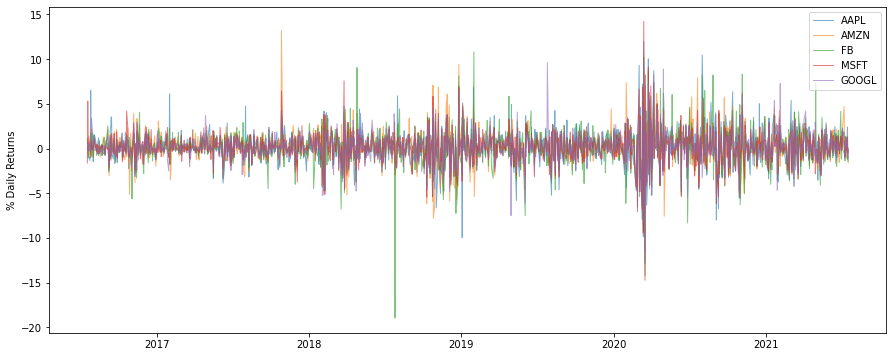

In [66]:
plt.figure(figsize=(15, 6))
for i in daily_return.columns.values:
    plt.plot(daily_return.index, daily_return[i]*100, lw=1, alpha=0.6,label=i)
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('% Daily Returns')

#### Daily Cumulative Return

In [67]:
daily_cum_return = (1+daily_return).cumprod() - 1
daily_cum_return.tail()

,AAPL,AMZN,FB,MSFT,GOOGL
Date,,,,,
2021-07-12,5.197748,4.051897,1.958532,4.578635,2.371628
2021-07-13,5.246644,3.995938,1.949568,4.652260,2.381346
2021-07-14,5.397191,4.001807,1.912206,4.683038,2.405125
2021-07-15,5.368454,3.933226,1.885650,4.653266,2.372411
2021-07-16,5.278812,3.855014,1.858004,4.647633,2.371481


Text(0, 0.5, '% Daily Cumulative Returns')

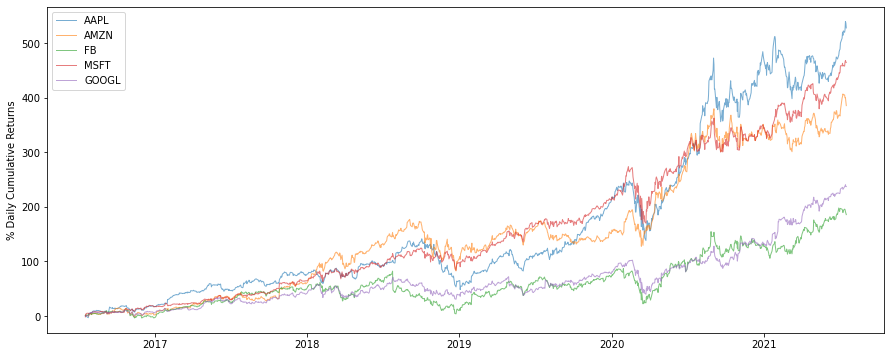

In [69]:
plt.figure(figsize=(15, 6))
for i in daily_cum_return.columns.values:
    plt.plot(daily_cum_return.index, daily_cum_return[i]*100, lw=1, alpha=0.6,label=i)
plt.legend(loc='upper left', fontsize=10)
plt.ylabel('% Daily Cumulative Returns')